In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dfmodels = pd.read_csv('results/model_summary.csv', index_col=0)

In [3]:
dfmodels

,depth,num_parameters,feature_set,mean_train_r,mean_dev_r,mean_training_time
0,deep,6167553,full,0.207707,0.127014,276
1,deep,6167553,pca,0.227564,0.168103,237
2,deep,6057985,pca_reduced,0.178007,0.115880,269
3,moderate,3541505,full,0.375782,0.178431,84
4,moderate,3541505,pca,0.386659,0.210108,85
5,moderate,3431937,pca_reduced,0.359613,0.191398,88
6,shallow,284161,full,0.458004,0.207407,35
7,shallow,284161,pca,0.440715,0.193095,20
8,shallow,229377,pca_reduced,0.374142,0.149468,20


In [49]:
dfmodels.pivot(index='depth', columns='feature_set', values='mean_training_time')

feature_set,full,pca,pca_reduced
depth,,,
deep,276,237,269
moderate,84,85,88
shallow,35,20,20


In [50]:
dfmodels.pivot(index='depth', columns='feature_set', values='mean_dev_r')

feature_set,full,pca,pca_reduced
depth,,,
deep,0.127014,0.168103,0.115880
moderate,0.178431,0.210108,0.191398
shallow,0.207407,0.193095,0.149468


In [ ]:
dfmodels[dfmodels['feature_set'] == 'full']

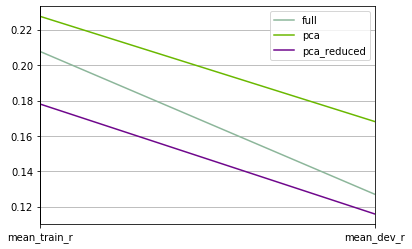

In [53]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(dfmodels[dfmodels['depth'] == 'deep'], 
                     class_column='feature_set', 
                     cols=['mean_train_r', 'mean_dev_r'])

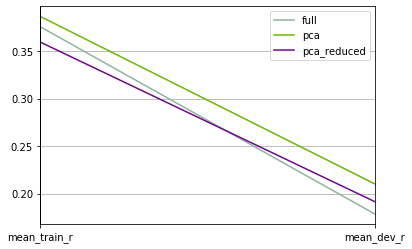

In [54]:
parallel_coordinates(dfmodels[dfmodels['depth'] == 'moderate'], 
                     class_column='feature_set', 
                     cols=['mean_train_r', 'mean_dev_r'])

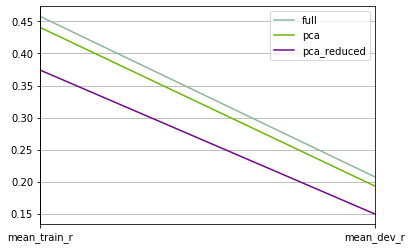

In [55]:
parallel_coordinates(dfmodels[dfmodels['depth'] == 'shallow'], 
                     class_column='feature_set', 
                     cols=['mean_train_r', 'mean_dev_r'])

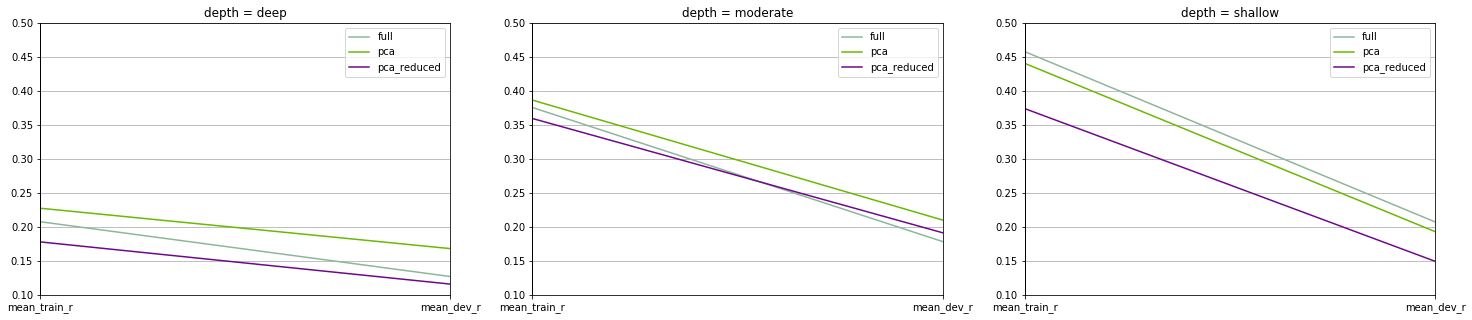

In [67]:
fig = plt.figure(figsize=(25, 5))
# fig, ax = plt.subplots(1, 3, sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
index = 0
plot_index = 1
depth = ['deep', 'moderate', 'shallow']

for i in range(len(depth)):
    ax = fig.add_subplot(1, len(depth), plot_index)
    parallel_coordinates(dfmodels[dfmodels['depth'] == depth[i]], 
                     class_column='feature_set', 
                     cols=['mean_train_r', 'mean_dev_r'])
    
    ax.set_title('depth = {}'.format(depth[index]))
    ax.set_ylim([0.1, 0.5])

    index += 1
    plot_index +=1

plt.savefig('pc.png', bbox_inches='tight', dpi=600)
plt.show()

In [90]:
pdp = pd.melt(dfmodels, id_vars=['depth', 'feature_set'], value_vars=['mean_train_r', 'mean_dev_r'])
pdp1 = pdp.pivot_table(index='depth', columns=['feature_set', 'variable'], values=['value'])
pdp1

value                                                   \
feature_set       full                     pca              pca_reduced   
variable    mean_dev_r mean_train_r mean_dev_r mean_train_r  mean_dev_r   
depth                                                                     
deep          0.127014     0.207707   0.168103     0.227564    0.115880   
moderate      0.178431     0.375782   0.210108     0.386659    0.191398   
shallow       0.207407     0.458004   0.193095     0.440715    0.149468   

                          
feature_set               
variable    mean_train_r  
depth                     
deep            0.178007  
moderate        0.359613  
shallow         0.374142

In [93]:
pdp2 = pdp1.stack('variable')
pdp2

value                      
feature_set                full       pca pca_reduced
depth    variable                                    
deep     mean_dev_r    0.127014  0.168103    0.115880
         mean_train_r  0.207707  0.227564    0.178007
moderate mean_dev_r    0.178431  0.210108    0.191398
         mean_train_r  0.375782  0.386659    0.359613
shallow  mean_dev_r    0.207407  0.193095    0.149468
         mean_train_r  0.458004  0.440715    0.374142

In [98]:
pdp2.index

MultiIndex([(    'deep',   'mean_dev_r'),
            (    'deep', 'mean_train_r'),
            ('moderate',   'mean_dev_r'),
            ('moderate', 'mean_train_r'),
            ( 'shallow',   'mean_dev_r'),
            ( 'shallow', 'mean_train_r')],
           names=['depth', 'variable'])

In [132]:
pdp3 = pdp2.reset_index('variable')
pdp4 = pdp3.reset_index('depth')
pdp5 = pdp4['value'].copy()
pdp5

feature_set,full,pca,pca_reduced
0,0.127014,0.168103,0.115880
1,0.207707,0.227564,0.178007
2,0.178431,0.210108,0.191398
3,0.375782,0.386659,0.359613
4,0.207407,0.193095,0.149468
5,0.458004,0.440715,0.374142


In [135]:
pdp5['depth'] = pdp4['depth'].values
pdp5['variable'] = pdp4['variable'].values

In [136]:
pdp5

feature_set,full,pca,pca_reduced,depth,variable
0,0.127014,0.168103,0.115880,deep,mean_dev_r
1,0.207707,0.227564,0.178007,deep,mean_train_r
2,0.178431,0.210108,0.191398,moderate,mean_dev_r
3,0.375782,0.386659,0.359613,moderate,mean_train_r
4,0.207407,0.193095,0.149468,shallow,mean_dev_r
5,0.458004,0.440715,0.374142,shallow,mean_train_r


In [130]:
pdp4['depth'].values

array(['deep', 'deep', 'moderate', 'moderate', 'shallow', 'shallow'],
      dtype=object)

In [89]:
pdp

,depth,feature_set,variable,value
0,deep,full,mean_train_r,0.207707
1,deep,pca,mean_train_r,0.227564
2,deep,pca_reduced,mean_train_r,0.178007
3,moderate,full,mean_train_r,0.375782
4,moderate,pca,mean_train_r,0.386659
5,moderate,pca_reduced,mean_train_r,0.359613
6,shallow,full,mean_train_r,0.458004
7,shallow,pca,mean_train_r,0.440715
8,shallow,pca_reduced,mean_train_r,0.374142
9,deep,full,mean_dev_r,0.127014


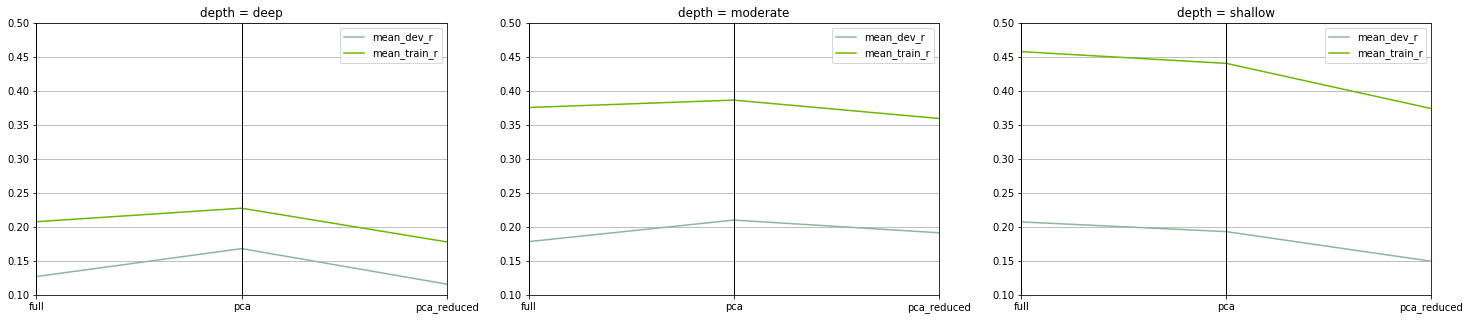

In [137]:
fig = plt.figure(figsize=(25, 5))
# fig, ax = plt.subplots(1, 3, sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
index = 0
plot_index = 1
depth = ['deep', 'moderate', 'shallow']

for i in range(len(depth)):
    ax = fig.add_subplot(1, len(depth), plot_index)
    parallel_coordinates(pdp5[pdp5['depth'] == depth[i]], 
                     class_column='variable', 
                     cols=['full', 'pca', 'pca_reduced'])
    
    ax.set_title('depth = {}'.format(depth[index]))
    ax.set_ylim([0.1, 0.5])

    index += 1
    plot_index +=1

plt.savefig('pc.png', bbox_inches='tight', dpi=600)
plt.show()

In [138]:
dftrainloss = pd.read_csv('results/train_losses.csv')

In [144]:
dftrainlossfull = dftrainloss[dftrainloss['1'] == 'full'].copy()

In [145]:
dftrainlossfull

,Unnamed: 0,0,1,2
0,0,deep,full,"[15.011883856354903, 9.762970173984245, 8.5580..."
1,1,deep,full,"[9.215252129028716, 5.905071600174148, 3.74265..."
2,2,deep,full,"[15.834415524329472, 10.239488393350298, 7.759..."
3,3,deep,full,"[12.371841377443534, 6.444423599162314, 6.0185..."
4,4,deep,full,"[13.022752272442968, 6.929190748204038, 5.9268..."
15,15,moderate,full,"[6.37464129230868, 2.7343031110865335, 2.50341..."
16,16,moderate,full,"[5.9639602068939395, 2.6786547549044677, 2.504..."
17,17,moderate,full,"[6.910733281343388, 2.537365394324035, 2.47102..."
18,18,moderate,full,"[7.467026105196685, 2.5134957171471815, 2.4745..."
19,19,moderate,full,"[6.907567309553623, 2.503644609205855, 2.46869..."


In [146]:
dftrainlossfull['count'] = [len(a.split(',')) for a in dftrainlossfull['2'].values]

In [148]:
dftrainlossfull.groupby(['0', '1']).mean()

,,Unnamed: 0,count
0,1,,
deep,full,2.0,13.8
moderate,full,17.0,7.4
shallow,full,32.0,9.4


# Test set performance 

In [149]:
X_train = np.load('X_train.npy')
X_dev = np.load('X_dev.npy')
X_test = np.load('X_test.npy')

Y_train = np.load('Y_train.npy')
Y_dev = np.load('Y_dev.npy')
Y_test = np.load('Y_test.npy')

In [157]:
from tensorflow.keras import backend as K
import math
from datetime import datetime

def ztp_log_loss_inexact(y_true, y_pred):
    return K.mean(-y_true * K.log(y_pred + K.epsilon()) + K.log(K.exp(y_pred) - 1 + K.epsilon()))

# Stirling's approximation https://www.tensorflow.org/api_docs/python/tf/nn/log_poisson_loss
def ztp_log_loss_full(y_true, y_pred):
    return K.mean(-y_true * K.log(y_pred + K.epsilon()) 
                  + K.log(K.exp(y_pred) - 1 + K.epsilon()) 
                  + y_true * K.log(y_true + K.epsilon()) - y_true + 0.5 * K.log(2 * math.pi * y_true + K.epsilon()))

In [161]:
def shallow_model(input_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=input_size, input_shape=(input_size,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(units=512),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(units=256),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(units=128),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(units=64),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(units=32),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(units=1),
        tf.keras.layers.Activation('relu'),
    ])
    
    model.compile(loss = ztp_log_loss_full,
          metrics = ['mse', 'poisson'],
          optimizer = keras.optimizers.Adam())

    return model

In [162]:
model = shallow_model(X_train.shape[1])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ton = tf.keras.callbacks.TerminateOnNaN()
start_time = datetime.now()
result = model.fit(X_train, Y_train, 
                   epochs=100, batch_size=20, 
                   validation_data=(X_dev, Y_dev), 
                   callbacks=[es, ton],
                   verbose=2)
total_time = datetime.now() - start_time
print('Total time: {}'.format(total_time.seconds))

Train on 13211 samples, validate on 1652 samples
Epoch 1/100
13211/13211 - 3s - loss: 16.6827 - mse: 19.2994 - poisson: 15.1842 - val_loss: 7.0452 - val_mse: 13.1709 - val_poisson: 3.4697
Epoch 2/100
13211/13211 - 2s - loss: 3.4591 - mse: 12.3207 - poisson: -1.3543e+00 - val_loss: 2.5295 - val_mse: 9.5914 - val_poisson: -2.2142e+00
Epoch 3/100
13211/13211 - 2s - loss: 2.5273 - mse: 9.5496 - poisson: -2.4861e+00 - val_loss: 2.4906 - val_mse: 9.2552 - val_poisson: -2.2609e+00
Epoch 4/100
13211/13211 - 2s - loss: 2.4906 - mse: 9.2325 - poisson: -2.5249e+00 - val_loss: 2.4836 - val_mse: 9.1687 - val_poisson: -2.2684e+00
Epoch 5/100
13211/13211 - 2s - loss: 2.4750 - mse: 9.0800 - poisson: -2.5397e+00 - val_loss: 2.4865 - val_mse: 9.2094 - val_poisson: -2.2651e+00
Epoch 6/100
13211/13211 - 2s - loss: 2.4497 - mse: 8.8371 - poisson: -2.5639e+00 - val_loss: 2.4838 - val_mse: 9.2157 - val_poisson: -2.2672e+00
Epoch 7/100
13211/13211 - 2s - loss: 2.4323 - mse: 8.6795 - poisson: -2.5802e+00 - val

Test set correlation

(0.13814269390929446, 1.7245520665343305e-08)


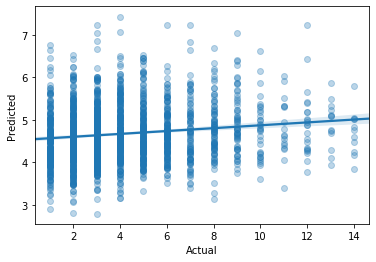

In [167]:
import scipy
print(scipy.stats.pearsonr(Y_test, model.predict(X_test).flatten()))
p1 = sns.regplot(x=Y_test, y=model.predict(X_test).flatten(), scatter_kws={'alpha': 0.3})
p1.set_xlabel('Actual')
p1.set_ylabel('Predicted')
p1_fig = p1.get_figure()
p1_fig.savefig('corr.png', bbox_inches='tight', dpi=600)